In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df_geo=pd.read_csv('geo_sample_table.csv',low_memory=False)
df_geo.head()

,Accession,Title,Sample Type,Taxonomy,Channels,Platform,Series,Supplementary Types,Supplementary Links,SRA Accession,Contact,Release Date
0,GSM1,Foreskin Fibroblasts,SAGE,Homo sapiens,1,GPL4,GSE506,NaN,NaN,NaN,Marc Kenzelmann,"Sep 28, 2000"
1,GSM2,HCMV-infected foreskin fibroblasts,SAGE,Homo sapiens,1,GPL4,GSE506,NaN,NaN,NaN,Marc Kenzelmann,"Sep 28, 2000"
2,GSM3,testis a,RNA,Drosophila melanogaster,1,GPL5,GSE462,NaN,NaN,NaN,Brian Oliver,"Oct 18, 2000"
3,GSM4,testis b,RNA,Drosophila melanogaster,1,GPL5,GSE462,NaN,NaN,NaN,Brian Oliver,"Oct 18, 2000"
4,GSM5,male a,RNA,Drosophila melanogaster,1,GPL5,GSE462,NaN,NaN,NaN,Brian Oliver,"Oct 18, 2000"


In [25]:
#convert date format and year column
df_geo['Release Date'] = pd.to_datetime(df_geo['Release Date'])
df_geo['year'] = df_geo['Release Date'].dt.year

In [26]:
#new samples by year
df_geo_dates = df_geo.groupby('year').year.count()
print(df_geo_dates)

year
2000        10
2001       660
2002      1975
2003      7741
2004     17872
2005     35384
2006     45778
2007     77969
2008     84901
2009    111126
2010    126126
2011    163605
2012    178775
2013    202828
2014    252056
2015    265486
2016    348017
2017    393827
2018    501720
2019    423536
Name: year, dtype: int64


In [27]:
#cumulative geo sample by year
cumulative = [0]
dates = []
counter = 0
for index, value in df_geo_dates.items():
    value = int(value) + cumulative[counter]
    cumulative.append(value)
    counter+=1
    dates.append(index)
cumulative = cumulative[1:]

cumulative_geo_samples_with_year = pd.Series(cumulative, index=dates)

print(cumulative_geo_samples_with_year)

2000         10
2001        670
2002       2645
2003      10386
2004      28258
2005      63642
2006     109420
2007     187389
2008     272290
2009     383416
2010     509542
2011     673147
2012     851922
2013    1054750
2014    1306806
2015    1572292
2016    1920309
2017    2314136
2018    2815856
2019    3239392
dtype: int64


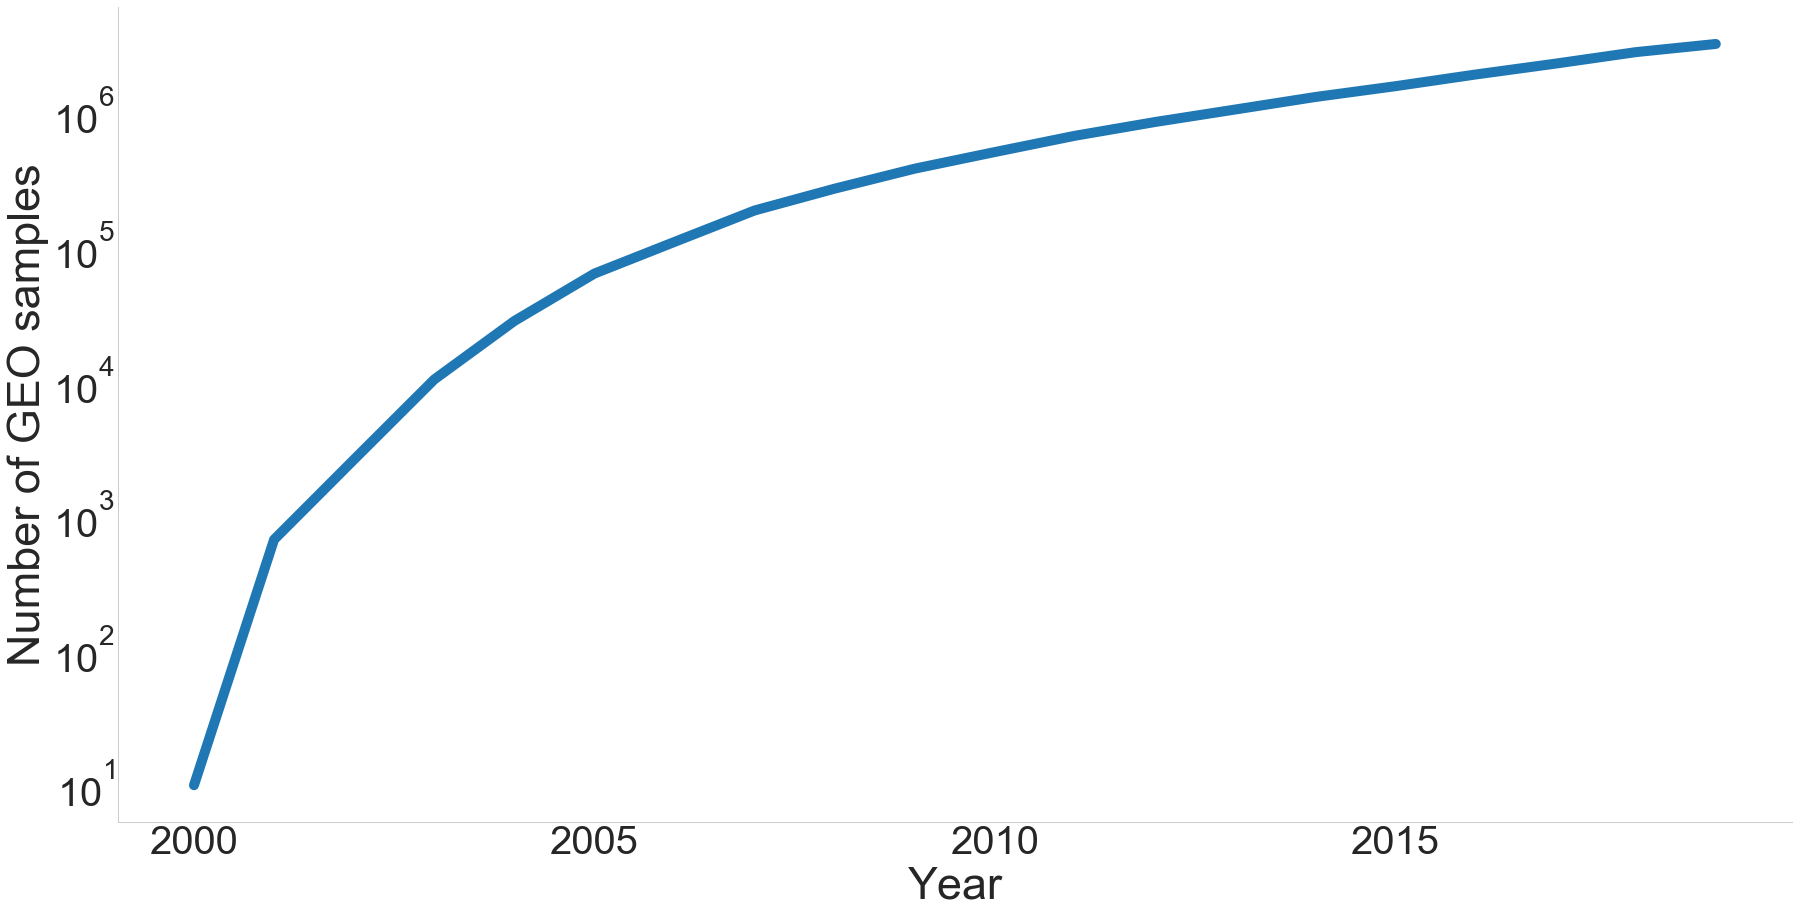

In [29]:
plt.style.use('seaborn-whitegrid')
sns.set_context(font_scale=3, rc={"lines.linewidth": 10})
plt.figure(figsize=(30,15))

ax = sns.lineplot(data = cumulative_geo_samples_with_year)
ax.set_xlabel("Year", fontsize=45)
ax.set_ylabel("Number of GEO samples", fontsize=45)
ax.locator_params(integer=True)
plt.yscale('log')

ax.grid(False)
sns.despine()
plt.tick_params(labelsize=40)

plt.savefig('geo_growth_by_year_cumulative.png')